In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
import os
import pickle
import sqlite3

# nltk for preprocessing of text data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# sklearn for preprocessing and machine learning models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# XGBoost for Machine Learning (Gradient Boosting Machine (GBM))
import xgboost as xgb

# Keras for neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Random seeds for consistent results
from tensorflow import set_random_seed
seed = 1234
np.random.seed(seed)
set_random_seed(seed)

Using TensorFlow backend.


In [39]:
raw_df = pd.read_csv('D:\\Project\\Tweets.csv') 
print('Raw Dataframe:')
raw_df.head(3)

Raw Dataframe:


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [3]:
df = raw_df

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 11135 to 11055
Data columns (total 16 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
cleaned_text                    14640 non-null object
dtypes: float64(2), int64(2), obj

In [41]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [43]:
print(df.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
cleaned_text                        0
dtype: int64


In [44]:
df.shape

(14640, 16)

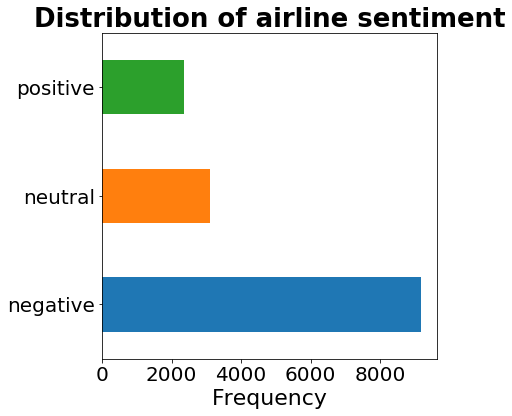

In [45]:
df['airline_sentiment'].value_counts().plot(kind = 'barh',
                                            figsize = (6,6));
plt.title('Distribution of airline sentiment', 
          fontsize = 26, weight = 'bold')
plt.xlabel('Frequency', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

[]

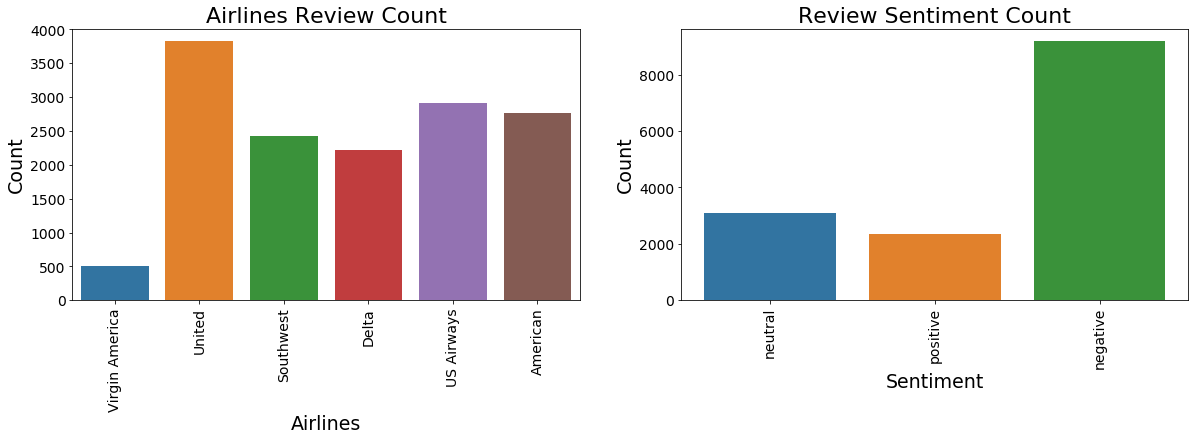

In [5]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.subplot(121)
col = "airline"
xlabel = "Airlines"
ylabel = "Count"

sns.countplot(x=df[col])
plt.title("Airlines Review Count")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.subplot(122)
col = "airline_sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(df[col])
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

[]

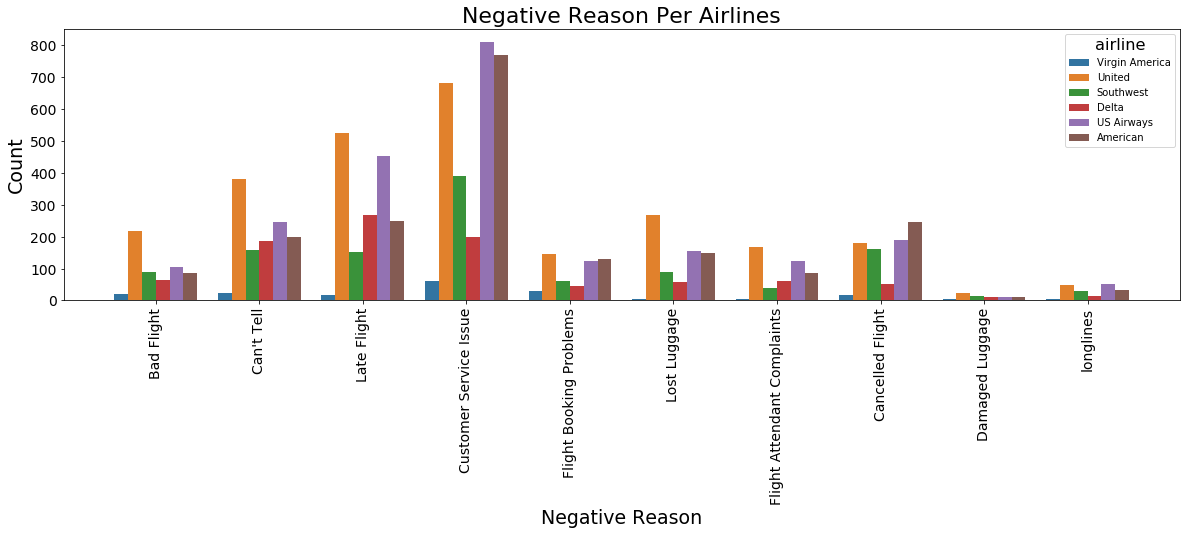

In [6]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Negative Reason"
ylabel = "Count"

title = "Negative Reason Per Airlines"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "negativereason"
col2 = "airline"
sns.countplot(x=df[col1], hue=df[col2])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

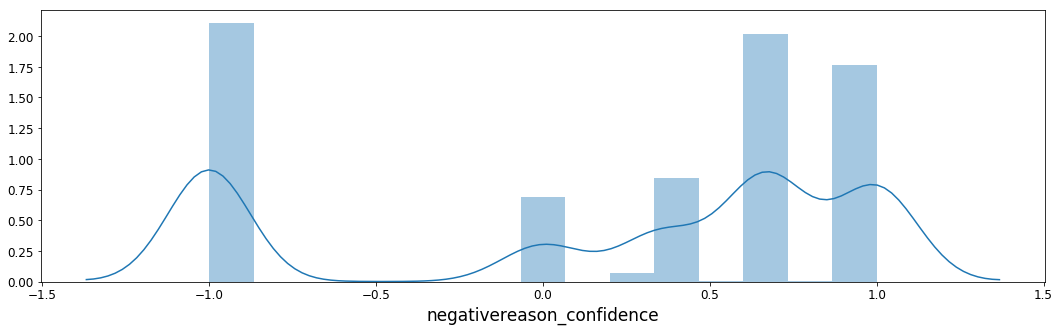

In [7]:
x = df["negativereason_confidence"].fillna(-1)

figsize=(18, 5)

ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
sns.distplot(x)
plt.plot()

# pre processing

In [9]:
class PreProcessor:
    '''
    Easily performs all the standard preprocessing steps
    like removing stopwords, stemming, etc.
    Only input that you need to provide is the dataframe and column name for the tweets
    '''
    def __init__(self, df, column_name):
        self.data = df
        self.conversations = list(self.data[column_name])
        self.stopwords = set(stopwords.words('english'))
        self.stemmer = SnowballStemmer("english")
        self.preprocessed = []
        
    def tokenize(self, sentence):
        '''
        Splits up words and makes a list of all words in the tweet
        '''
        tokenized_sentence = word_tokenize(sentence)
        return tokenized_sentence
            
    def remove_stopwords(self, sentence):
        '''Removes stopwords like 'a', 'the', 'and', etc.'''
        filtered_sentence = []
        for w in sentence:
            if w not in self.stopwords and len(w) > 1 and w[:2] != '//' and w != 'https': 
                filtered_sentence.append(w)
        return filtered_sentence
    
    def stem(self, sentence):
        '''
        Stems certain words to their root form.
        For example, words like 'computer', 'computation'
        all get truncated to 'comput'
        '''
        return [self.stemmer.stem(word) for word in sentence]
    
    def join_to_string(self, sentence):
        '''
        Joins the tokenized words to one string.
        '''
        return ' '.join(sentence)
    
    def full_preprocess(self, n_rows=None):
        '''
        Preprocess a selected number of rows and
        connects them back to strings
        '''
        # If nothing is given do it for the whole dataset
        if n_rows == None:
            n_rows = len(self.data)
            
        # Perform preprocessing
        for i in range(n_rows):
            tweet = self.conversations[i]
            tokenized = self.tokenize(tweet)
            cleaned = self.remove_stopwords(tokenized)
            stemmed = self.stem(cleaned)
            joined = self.join_to_string(stemmed)
            self.preprocessed.append(joined)
        return self.preprocessed

In [12]:
# Preprocess text and put it in a new column
preprocessor = PreProcessor(df, 'text')
df['cleaned_text'] = preprocessor.full_preprocess()

In [46]:
df['cleaned_text'].head(5)

11135    usairway bought ticket month ago had seat toge...
3783     unit flight mke ord get delay our gate attend ...
13332    americanair my boyfriend suppos home saturday ...
11639                              usairway sit throne lie
4496     southwestair 's principl 's hard get mug amp u...
Name: cleaned_text, dtype: object

In [14]:
# Shuffling so we can get random tweets for the test set
df = shuffle(df, random_state=seed)
# Keep 1000 samples of the data as test set
test_set = df[:1000]

In [15]:
# Get training and validation data
X_train, X_val, y_train, y_val = train_test_split(df['cleaned_text'][1000:], 
                                                  df['airline_sentiment'][1000:], 
                                                  test_size=0.2, 
                                                  random_state=seed)

# Get sentiment labels for test set
y_test = test_set['airline_sentiment']

# Data vectorization

In [16]:
# Create matrix based on word frequency in tweets
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(test_set['cleaned_text'])

In [17]:
# Print the size of our data
print(f'Training size: {X_train.shape[0]} tweets\n\
Validation size: {X_val.shape[0]} tweets\n\
Test size: {X_test.shape[0]} tweets\n\
Amount of words (columns): {X_train.shape[1]} words')

Training size: 10912 tweets
Validation size: 2728 tweets
Test size: 1000 tweets
Amount of words (columns): 9672 words


# ML Models

# Multinomial Naive Bayes

In [18]:
# Multinomial Naive Bayes
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
# Check results
train_pred = multi_nb.predict(X_train)
val_pred = multi_nb.predict(X_val)
print(f'Accuracy on training set (MultinomialNB): {round(accuracy_score(y_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (MultinomialNB): {round(accuracy_score(y_val,val_pred)*100, 4)}%')

Accuracy on training set (MultinomialNB): 72.6998%
Accuracy on validation set (MultinomialNB): 69.1349%


# Sklearn's Gradient Boosting Machine (GBM)

In [20]:
# sklearn's Gradient Boosting Classifier (GBM)
gbm = GradientBoostingClassifier(n_estimators=200, 
                                 max_depth=6, 
                                 random_state=seed)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [21]:
# Check results
train_pred = gbm.predict(X_train)
val_pred = gbm.predict(X_val)
print(f'Accuracy on training set (GBM): {round(accuracy_score(y_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (GBM): {round(accuracy_score(y_val,val_pred)*100, 4)}%')

Accuracy on training set (GBM): 87.5367%
Accuracy on validation set (GBM): 76.4296%


# XGBoost (GBM)

In [22]:
# Hyperparameters that you can tweak
# There are a lot more tweakable hyperparameters that you can find at 
# https://xgboost.readthedocs.io/en/latest/parameter.html
xgb_params = {'objective' : 'multi:softmax',
              'eval_metric' : 'mlogloss',
              'eta' : 0.1,
              'max_depth' : 6,
              'num_class' : 3,
              'lambda' : 0.8,
              'estimators' : 200,
              'seed' : seed
              
}

# Transform categories into numbers
# negative = 0, neutral = 1 and positive = 2
target_train = y_train.astype('category').cat.codes
target_val = y_val.astype('category').cat.codes

# Transform data into a matrix so that we can use XGBoost
d_train = xgb.DMatrix(X_train, label = target_train)
d_val = xgb.DMatrix(X_val, label = target_val)

# Fit XGBoost
watchlist = [(d_train, 'train'), (d_val, 'validation')]
bst = xgb.train(xgb_params, 
                d_train, 
                400,  
                watchlist,
                early_stopping_rounds = 50, 
                verbose_eval = 0)

C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [23]:
# Check results for XGBoost
train_pred = bst.predict(d_train)
val_pred = bst.predict(d_val)
print(f'Accuracy on training set (XGBoost): {round(accuracy_score(target_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (XGBoost): {round(accuracy_score(target_val, val_pred)*100, 4)}%')

Accuracy on training set (XGBoost): 89.5803%
Accuracy on validation set (XGBoost): 77.3827%


# Simple neural network


In [24]:
# Generator so we can easily feed batches of data to the neural network
def batch_generator(X, y, batch_size, shuffle):
    number_of_batches = X.shape[0]/batch_size
    counter = 0
    sample_index = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1
        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0

In [25]:
# Onehot encoding of target variable
# Negative = [1,0,0], Neutral = [0,1,0], Positive = [0,0,1]

# Initialize sklearn's one-hot encoder class
onehot_encoder = OneHotEncoder(sparse=False)

# One hot encoding for training set
integer_encoded_train = np.array(y_train).reshape(len(y_train), 1)
onehot_encoded_train = onehot_encoder.fit_transform(integer_encoded_train)

# One hot encoding for validation set
integer_encoded_val = np.array(y_val).reshape(len(y_val), 1)
onehot_encoded_val = onehot_encoder.fit_transform(integer_encoded_val)

In [26]:
# Neural network architecture
initializer = keras.initializers.he_normal(seed=seed)
activation = keras.activations.elu
optimizer = keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)

# Build model architecture
model = Sequential()
model.add(Dense(20, activation=activation, kernel_initializer=initializer, input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', kernel_initializer=initializer))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Hyperparameters
epochs = 50
batch_size = 32

# Fit the model using the batch_generator
hist = model.fit_generator(generator=batch_generator(X_train, onehot_encoded_train, batch_size=batch_size, shuffle=True),
                           epochs=epochs, validation_data=(X_val, onehot_encoded_val),
                           steps_per_epoch=X_train.shape[0]/batch_size, callbacks=[es])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
341/341 [==============================] - 7s 19ms/step - loss: 0.5783 - acc: 0.6981 - val_loss: 0.5196 - val_acc: 0.8067
Epoch 2/50
341/341 [==============================] - 5s 15ms/step - loss: 0.5006 - acc: 0.7785 - val_loss: 0.4724 - val_acc: 0.7826
Epoch 3/50
341/341 [==============================] - 5s 14ms/step - loss: 0.4636 - acc: 0.7897 - val_loss: 0.4431 - val_acc: 0.7996
Epoch 4/50
341/341 [==============================] - 5s 14ms/step - loss: 0.4306 - acc: 0.8089 - val_loss: 0.4174 - val_acc: 0.8113
Epoch 5/50
341/341 [==============================] - 4s 13ms/step - loss: 0.4002 - acc: 0.8229 - val_loss: 0.3961 - val_acc: 0.8239
Epoch 6/50
341/341 [==============================] - 5s 14ms/step - loss: 0.3747 - acc: 0.8346 - va

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                193460    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 193,523
Trainable params: 193,523
Non-trainable params: 0
_________________________________________________________________


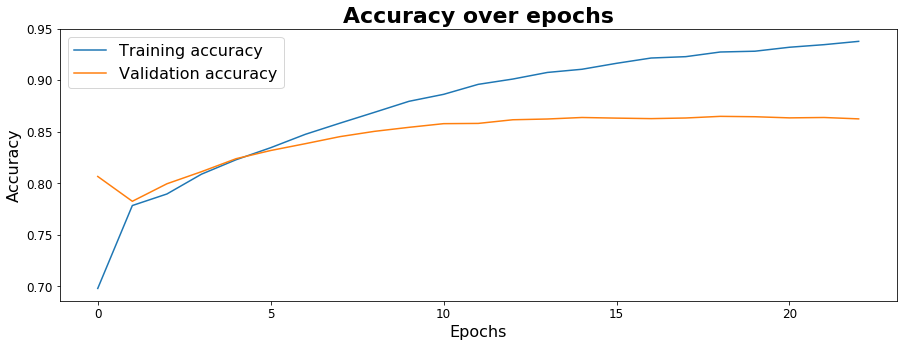

In [27]:
# Visualize Accuracy
acc = hist.history['acc']
val_acc = hist.history['val_acc']

# Get the amount of epochs for visualization
stopped_epoch = es.stopped_epoch
n_epochs = range(stopped_epoch+1)

# Plot training and validation accuracy
plt.figure(figsize=(15,5))
plt.plot(n_epochs, acc)
plt.plot(n_epochs, val_acc)
plt.title('Accuracy over epochs', weight='bold', fontsize=22)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=16)
plt.show()

In [28]:
# Check results of neural network model
train_pred = [np.argmax(pred) for pred in model.predict(X_train)]
val_pred = [np.argmax(pred) for pred in model.predict(X_val)]
print(f'Accuracy on training set (Small NN): {round(accuracy_score(target_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (Small NN): {round(accuracy_score(target_val, val_pred)*100, 4)}%')

Accuracy on training set (Small NN): 91.8897%
Accuracy on validation set (Small NN): 78.7757%


# Rule based models

# Always predict negative


In [29]:
# Predict negative for the whole dataset
negative_pred_train = ['negative' for _ in range(len(y_train))]
negative_pred_val = ['negative' for _ in range(len(y_val))]

print(f'Accuracy on training set (Always Predict Negative): {round(accuracy_score(y_train, negative_pred_train)*100, 4)}%')
print(f'Accuracy on validation set (Always Predict Negative): {round(accuracy_score(y_val, negative_pred_val)*100, 4)}%')

Accuracy on training set (Always Predict Negative): 62.445%
Accuracy on validation set (Always Predict Negative): 63.5264%


# Model comparison with test set


In [30]:
# Predict Always Negative
negative_test_pred = ['negative' for _ in range(len(y_test))]

# Multinomial Naive Bayes
multinb_test_pred = multi_nb.predict(X_test)

# Gradient Boosting Classifier
gbm_test_pred = gbm.predict(X_test)

# XGBoost
# Transform test data for XGBoost
target_test = y_test.astype('category').cat.codes
d_test = xgb.DMatrix(X_test, label = target_test)
xgboost_test_pred = bst.predict(d_test)

# Neural Network predictions
nn_test_pred = [np.argmax(pred) for pred in model.predict(X_test)]

C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [31]:
# Get accuracies
print(f'Accuracy for Always Predict Negative: {round(accuracy_score(y_test, negative_test_pred)*100, 4)}%')
print(f'Accuracy for Multinomial Naive Bayes: {round(accuracy_score(y_test, multinb_test_pred)*100, 4)}%')
print(f'Accuracy for Gradient Boosting Classifier: {round(accuracy_score(y_test, gbm_test_pred)*100, 4)}%')
print(f'Accuracy for XGBoost: {round(accuracy_score(target_test, xgboost_test_pred)*100, 4)}%')
print(f'Accuracy for Neural Network: {round(accuracy_score(target_test, nn_test_pred)*100, 4)}%')

Accuracy for Always Predict Negative: 63.1%
Accuracy for Multinomial Naive Bayes: 67.8%
Accuracy for Gradient Boosting Classifier: 77.9%
Accuracy for XGBoost: 78.2%
Accuracy for Neural Network: 79.7%


# Save models

In [33]:
# Save XGBoost model
pickle.dump(bst, open('xgboost_sentiment_model.dat', 'wb'))

# Save Neural Network model
model.save('nn_sentiment_model.h5')

# Make predictions

In [34]:
# Create dataframe with predictions for XGBoost and Neural Network
pred_df = pd.DataFrame({'tweet_id': test_set['tweet_id'],
                        'text' : test_set['text'],
                       'xgboost_pred' : xgboost_test_pred.astype(int),
                       'nn_pred' : nn_test_pred,})

# Change predictions back to string values
pred_df['xgboost_pred'] = pred_df['xgboost_pred'].map({0: 'Negative', 1: 'Neutral', 2 : 'Positive'})
pred_df['nn_pred'] = pred_df['nn_pred'].map({0: 'Negative', 1: 'Neutral', 2 : 'Positive'})

In [35]:
# Check if two models are in agreement
pred_df['pred_agreement'] = (pred_df['xgboost_pred'] == pred_df['nn_pred'])
print(f"The models agree with each other {round(pred_df['pred_agreement'].value_counts()[1]/len(pred_df)*100, 4)}% of the time.")

The models agree with each other 85.7% of the time.


# Save predictions to csv

In [36]:
# Save to csv
pred_df.to_csv('sentiments.csv', index=False)

In [48]:
# Final test
df_test = pd.read_csv('sentiments.csv'); df_test.head(10)

,tweet_id,text,xgboost_pred,nn_pred,pred_agreement
0,568486436355346432,@USAirways we bought our tickets months ago. H...,Negative,Negative,True
1,568129652625158147,@united why is my flight from mke to ord getti...,Negative,Negative,True
2,569887996071297024,@AmericanAir My boyfriend was supposed to be h...,Negative,Negative,True
3,567858957546561536,@USAirways sits on a throne of lies,Negative,Negative,True
4,570204088908034049,@SouthwestAir it's just the principle - it's h...,Negative,Negative,True
5,568178355452792832,@SouthwestAir I dunno my travel information.. ...,Neutral,Neutral,True
6,568968059517411329,@JetBlue flight 348 is a freaking nightmare to...,Negative,Negative,True
7,569612120758878208,@JetBlue follow for DM please,Neutral,Neutral,True
8,569329921740427264,@JetBlue she did. she's still waiting on a cal...,Negative,Negative,True
9,569996914546094080,“@JetBlue: Our fleet's on fleek. http://t.co/T...,Neutral,Neutral,True
